# Example Notebook For Group Projects#

08-28-2015

This is an example notebook for the types of analysis that will be performed on Day 5 of the Biocomputing Bootcamp.

#### Setup

In [26]:
# imports matplotlib
# import pyplot to plt
%pylab inline
import numpy as np
import subprocess
import re
from scipy import stats
import os
import csv
import vcf
import sys
import pysam
from operator import itemgetter
from itertools import groupby, cycle

workDir = '/home/remills/day5/'
# workDir ='/scratch/biobootcamp_fluxod/myname/day5/'
genoDir= '/scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/genotypes_fixed/'
expDir = '/scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/analysis_results'

os.chdir(workDir)

print('Work directory is',os.getcwd())
print('Genotype directory is',genoDir)
print('Gene Expression directory is',expDir)

Populating the interactive namespace from numpy and matplotlib
Work directory is /home/remills/day5
Genotype directory is /scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/genotypes_fixed/
Gene Expression directory is /scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/analysis_results


In [4]:
# you will hit an error in the above line.
# read the error message and determine what needs to be done (here and at the terminal)

###Obtaining Data
Scientists must often make use of large data sets that are made available on either websites or data repositories. Here, we have already downloaded the pertinent data, but for reference here is a way the data could be obtained.

In [5]:

#os.chdir(expDir)
#subprocess.call(["wget", "ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/GEUV/E-GEUV-1/analysis_results/*"])
#os.chdir(genoDir)
#subprocess.call(["wget", "ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/GEUV/E-GEUV-1/genotypes/*"])
#os.chdir(workDir)

### Parsing the expression value table
The file with gene-level quantification under the data directory
in a file named GeneQuantRPKM.txt

This file is a matrix of gene expression values across genes (rows) vs individuals (columns)

We'd like to parse the following:
  1. List of individual/sample names
  2. List of gene names
  
  
Go back to the shell and check it out via unix commands (less, cut, head)

In [6]:
pathToQuantFile = expDir + '/GD660.GeneQuantRPKM.txt'

#### Get list of individual/sample names from the quant file

 - first open the file for reading
 - Loop through the file, line by line
 - At each line, extract the gene name and add it to a list

In [7]:
def readIndivNamesFromExpressionTable( tableFileName ):
    tableFile = open( tableFileName, 'r' )
    
    firstLine = tableFile.readline()
    # split at the tab separators into a list
    firstLine = firstLine.rstrip().split('\t')
    
    firstLine = [ name.split('.')[0] for name in firstLine ]
    
    # everything after the fourth column
    return firstLine[4:]

In [8]:
expressionTableIndivs = readIndivNamesFromExpressionTable( pathToQuantFile )

# this returns a dict mapping from person name to the column number in the file

In [9]:
# sanity check - is this right?  (go back to your flux terminal and verify)
expressionTableIndivs.index( 'HG00105' )

9

#### DIY - get list of gene names from the quant file

 - first open the file for reading
 - Loop through the file, line by line
 - At each line, extract the gene name and add it to a list
 - final list should have entries of the form "ENSG###########" 


In [10]:
def readGeneNamesFromExpressionTable( tableFileName ):
    tableFile = open( tableFileName, 'r' )
    
    # ...

    # return something
    
# one solution:
def readGeneNamesFromExpressionTable( tableFileName ):
    tableFile = open( tableFileName,'r' )
    
    tableFile.readline()
    
    geneNames = []
    
    for line in tableFile:
        line = line.rstrip().split('\t')
        geneNames.append( line[0].split('.')[0] )
    
    return geneNames

In [12]:
listOfGeneNames = readGeneNamesFromExpressionTable( pathToQuantFile )

print(listOfGeneNames[0:10])

['ENSG00000225538', 'ENSG00000237851', 'ENSG00000243765', 'ENSG00000257527', 'ENSG00000212855', 'ENSG00000151503', 'ENSG00000254903', 'ENSG00000254681', 'ENSG00000250501', 'ENSG00000228477']


#### DIY - extract a given gene by name from this file

 - first open the file for reading
 - Loop through the file, line by line
 - If the gene name is equal to the one we're looking for, process the line:
     - extract numerical expression values from the line
     - make a dictionary from individual name to expression value
     - then return the dictionary
   
   
 - advanced: to perform this operation much more quickly, explore using pandas
 <pre>
 import pandas as pd
 tbl = pd.read_csv(filename, sep='\t')
 tbl = tbl.set_index #  (....a column name - which one do you want to index on? )
 tbl.ix['ENSG00000215372.5']



In [13]:
def extractExpressionValues( tableFileName, geneName, indivList  ):

    # open the file
    
    # loop over lines
    
    # when you reach a matching line, put expression value and individual name into a dictionary
    
    # hint 1: if you are part of the way there but stuck, try putting print statements 
    #    in your code to debug
    # 
    # hint 2: there many ways to do this -- but one useful function is zip
    #
    #   https://docs.python.org/2/library/functions.html#zip
    #   
    #   test combining two lists 
    #       my_favorites = zip( ['brewery','ice cream','peninsula'], ['new glarus','washtenaw','olympic'] )
    #   
    #   this will make a list of tuples
    #    
    #   a dictionary can be made from a list of tuples by calling
    #     dict( my_favorites ) 
    #  
    # hint 3: if you have a list that you need to convert to floating point numbers
    #    you could use a list comprehension such as
    #    one_list = [ float(thing) for thing in another_list ]
    #    
    
    # return ...
    
    return


# one solution:
def extractExpressionValues( tableFileName, geneName, indivList  ):
    tableFile = open( tableFileName, 'r' )
    
    tableFile.readline()
    
    for line in tableFile:
        
        line = line.strip('\n').split('\t')
        
        curLineGene = line[0].split('.')[0]
        
        if curLineGene == geneName:
            valueList = line[4:]
            
            valueList = [float(x) for x in valueList]
            
            indivToValue = dict( zip( indivList, valueList ))
            return indivToValue
        
    raise Exception('Unable to find a gene named %s'%geneName)

In [14]:
indivToExpr = extractExpressionValues( pathToQuantFile, 'ENSG00000151503', expressionTableIndivs )

In [17]:
print(list(indivToExpr.keys())[:10])
print(list(indivToExpr.values())[:10])

['HG00151', 'NA19175', 'HG00238', 'NA20778', 'NA20506', 'NA20514', 'NA20503', 'NA19184', 'NA19200', 'HG00355']
[43.00973, 35.12407, 46.4334, 30.55804, 24.22438, 25.17415, 19.0011, 29.11722, 46.00021, 55.41036]


#### DIY:  visualize the distribution of expression values for this gene

- refer back the day3 basic plotting notebook (https://github.com/bioboot/web-2015/blob/gh-pages/class-material/basic_matplotlib_plots.ipynb) to plot rank-ordered values


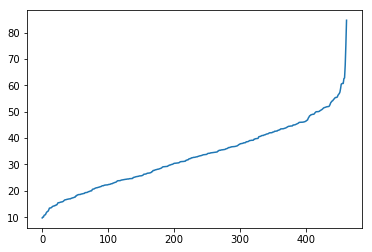

In [18]:
# one solution:
sortedValues = np.sort(list(indivToExpr.values()))
ranks = np.arange( 0,len(sortedValues) )
plt.plot( ranks, sortedValues )

### Pick a region

chr5:95,984,676-96,185,176 - Alcohol Dependence - ERAP1 - rs13160562 GWAS, rs1057569 eQTL  
chr11:47,426,802-47,627,302 - Body Mass Index - MTCH2 - rs3817334 GWAS, rs10838724 eQTL  
chr1:205,620,478-205,820,978 - Parkinsons disease - RAB7L1 - rs947211 GWAS, rs708725 eQTL  
chr21:38,432,812-38,633,312 - Eye color traits - TTC3 - rs1003719 GWAS, rs3787788 eQTL  
chr20:5,883,504-6,084,004 - HIV-1 control - MCM8 - rs454422 GWAS, rs13041190 eQTL  
chr5:156,807,522-157,008,022 - Pulmonary function - ADAM19 - rs2277027 GWAS, rs9313615 eQTL 

Go to ENSEMBL and find the gene identifier (starts "ENSG..") for your gene symbol (ERAP1, MTCH2,...)

Under "Search:" select Human, and enter your gene name.  You'll see a list of results, and look 
for an identifier beginning with "ENSG"

Quickly check for that line in the table using grep.  

In [19]:
chromo = '5'
startPos, endPos = 95984676, 96185176
region = chromo + ":" + str(startPos) + "-" + str(endPos)
region

'5:95984676-96185176'

#### DIY - extract & plot expression values for your gene
 - plot as a ranked list 
 - plot as a histogram
 - plot as a boxplot

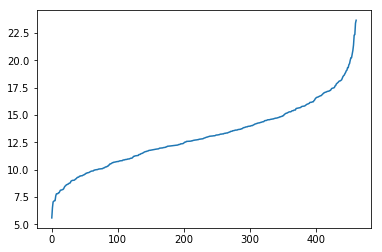

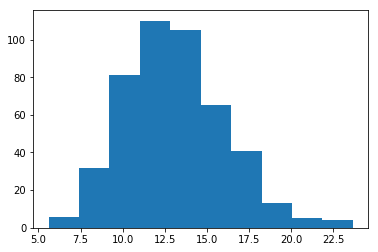

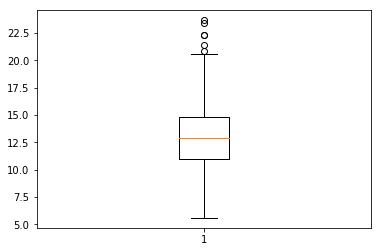

In [23]:
# one solution:

indivToExpr = extractExpressionValues( pathToQuantFile, 'ENSG00000053770', expressionTableIndivs )

sortedValues = np.sort(indivToExpr.values())
ranks = np.arange( 0,len(sortedValues) )
plt.plot( ranks, sortedValues )

plt.figure()
_ = plt.hist(sortedValues)

plt.figure()
_ = plt.boxplot(sortedValues)

### Extract genotype data
Now that we have the files in the proper format, we will pull out the relevant portions to 
our analysis using one of the regions of interest. 

Given that each region is ~200,000 bp in size, 
there will likely be many more SNPs than there are genes in the region. 

 - In your flux terminal, check out the genotypes directory.  Which file do you need to use?
 - These files are large!  We will not loop through the entire chromosome vcf just for our small region
 - Instead, we can use tabix -- try this from the command line and extract the results into an individual VCF in your own directory
 - use bgzip and tabix to compress this file


In [27]:
pathToMyGenotypes = genoDir + 'GEUVADIS.chr5.PH1PH2_465.IMPFRQFILT_BIALLELIC_PH.annotv2.genotypes.vcf.gz'
pathToMyRegionGenotypes = workDir + '/ERAP1_flank200k_genotypes.vcf.gz'

In [28]:
command = "tabix " + pathToMyGenotypes + " " + region + " > ERAP1_flank200k_genotypes.vcf" 
print(command)
subprocess.call(command, shell=True)

tabix /scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/genotypes_fixed/GEUVADIS.chr10.PH1PH2_465.IMPFRQFILT_BIALLELIC_PH.annotv2.genotypes.vcf.gz 5:95984676-96185176 > ERAP1_flank200k_genotypes.vcf


0

In [ ]:
command = "bgzip ERAP1_flank200k_genotypes.vcf; tabix ERAP1_flank200k_genotypes.vcf.gz" 
print(command)
subprocess.call(command, shell=True)

#### Try out PyVCF 

Quick introduction: http://pyvcf.readthedocs.org/en/latest/INTRO.html 

This is a useful python library for reading VCF files, so you don't have to write your own parser

In [4]:
vcfFile = vcf.Reader( filename='/scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/genotypes/GEUVADIS.chr5.PH1PH2_465.IMPFRQFILT_BIALLELIC_PH.annotv2.genotypes.vcf.gz')

In [5]:
line = next(vcfFile)

In [6]:
print(line)

Record(CHROM=9, POS=10023, REF=CCAA, ALT=[C])


In [7]:
print(line.genotype( 'NA07357' ))

Call(sample=NA07357, CallData(GT=0|0, GL=[0.0, -0.3, -5.4], DS=0.25, PP=None, BD=None))


In [8]:
print(line.INFO)

{'AN': 2184, 'CELL': ['GM12878'], 'AMR_AF': 0.15, 'THETA': 0.0047, 'CHROM_STATE': ['14'], 'RSQ': 0.1592, 'ANNOTATION_CLASS': ['ACTIVE_CHROM'], 'AVGPOST': 0.5946, 'ASN_AF': 0.14, 'LDAF': 0.2827, 'EUR_AF': 0.1, 'ERATE': 0.0142, 'GERP': [None], 'AF': 0.12, 'DAF_GLOBAL': [None], 'AFR_AF': 0.09, 'AC': [253], 'VT': 'INDEL'}


In [10]:
# what is the allele frequency (overall among our samples) of this variant?
print(line.INFO['AF'])
# what would 0.01 mean?  
# what would 0.99 mean?

0.12


In [11]:
print(line.genotype( 'NA07357' )['GT'])

0|0


In [12]:
#  http://pyvcf.readthedocs.org/en/latest/API.html?highlight=gt_type#vcf.model._Call.gt_type
print(line.genotype( 'NA07357' ).gt_type)

0


#### Select rows by genomic coordintate 

PyVCF has tabix functionality 'baked in'

Use the .fetch() command

In [14]:
# count number of variant records on chrom 9 between 40 and 40.1 Mbp
countOfLines = 0
for line in vcfFile.fetch( '9', 40000000, 40100000 ):
    countOfLines += 1
    
print(countOfLines)

OSError: index `/scratch/biobootcamp_fluxod/remills/bioboot/geuvadis/genotypes/GEUVADIS.chr9.PH1PH2_465.IMPFRQFILT_BIALLELIC_PH.annotv2.genotypes.vcf.gz.tbi` not found

#### DIY- count number of rows in same region with MAF > 5%

In [31]:
# one solution:
countOfLines = 0
for line in vcfFile.fetch( '9', 40000000, 40100000 ):
    if line.INFO['AF'] > 0.05 and line.INFO['AF'] < 0.95:
        countOfLines += 1
    
print(countOfLines)

24


#### DIY- count number of rows YOUR region with MAF > 5%

In [32]:
print(chromo,startPos,endPos)

5 95984676 96185176


In [33]:
# one solution:
countOfLines = 0

vcfFile = vcf.Reader( filename=pathToMyRegionGenotypes)

for line in vcfFile.fetch( chromo, startPos, endPos ):
    if line.INFO['AF'] > 0.05 and line.INFO['AF'] < 0.95:
        countOfLines += 1
    
print(countOfLines)

615


### Do a ordinary linear regression in python

- Using the function stats.linrgress 
- Consult documentation here http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html
- Or, use shift-TAB (as on Day 3) to get a brief description of arguments



#### Test with some well-correlated random samples
- sample X  ~ N(10,2)
- sample Y ~ 3*x + e, e ~ N(0,1)
- plot the points X versus Y
- plot the best fit line 



In [37]:
# one solution

x = np.random.normal( loc=10, scale=2, size=100 )
y = 3*x + np.random.normal( loc=0, scale=1, size=100 )

#Based on http://glowingpython.blogspot.com/2012/03/linear-regression-with-numpy.html
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print slope
print intercept
print r_value
print p_value
print std_err


2.92921105013
0.674335263806
0.985574651032
2.01844304122e-77
0.0508106060391


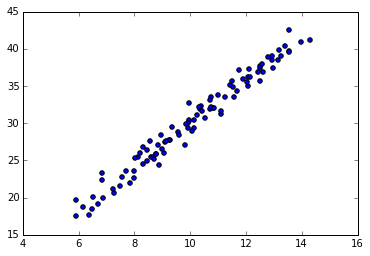

In [38]:
# DIY: plot x vs y
plt.scatter( x, y)

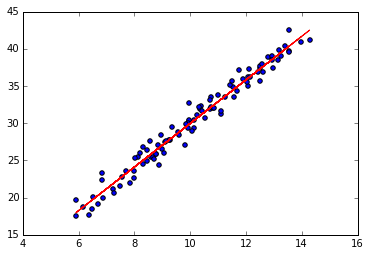

In [39]:
# DIY: plot x versus y and best fit line
y_fit = x*slope + intercept 
plt.scatter(x,y)
plt.plot(x,y_fit,color='red')

### Put it all together

- Loop through a list of genes in the region
- Get gene expression values
- In that region, loop through every SNP
    - Only consider SNPs with MAF > 5%
- For each SNP, perform a linear regression of expression against genotype (0,1,2)

In [40]:
#  SKELETON OF BELOW

In [1]:
# One solution
def regionVsSingleGene( fnQuant,
                        fnRegionVcf,
                        gene, 
                        chromo,
                        startPos, 
                        endPos,
                        cutoffToPlot = 1e-40,
                        makePlots=True ):

    vcfFile = vcf.Reader( open(fnRegionVcf,'r') )

    expressionTableIndivs = readIndivNamesFromExpressionTable( fnQuant )
    
    bestPval = 1e99
    bestSnpCoord = None

    listOfSnpCoords = []
    listOfPvalues = []    

    indivToExpr = extractExpressionValues( fnQuant, gene, expressionTableIndivs )

    listOfExpressionValues = []
    for sample in expressionTableIndivs:
        listOfExpressionValues.append( indivToExpr[sample] )

    counter = 0

    for record in vcfFile.fetch( chromo, startPos, endPos ):

        counter += 1
        if counter % 250 == 0 :
            print 'on snp #',counter,'...'

        if record.INFO['AF'] < 0.05 or record.INFO['AF'] > 0.95:
            continue

        listOfSnpCoords.append( record.POS )

        #look up each sample genotype using sample list
        listOfGenotypeCalls = []

        for sample in expressionTableIndivs:
            call = record.genotype( sample )
            geno = call.gt_type
            if geno != 0 and geno != 1 and geno != 2:
                geno = 0
            listOfGenotypeCalls.append( geno )

        #conver to numpy array for calculations     
        y = np.array(listOfExpressionValues)
        xi = np.array(listOfGenotypeCalls)

        #Based on http://glowingpython.blogspot.com/2012/03/linear-regression-with-numpy.html
        slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
        listOfPvalues.append( p_value )

        if p_value < bestPval:
            bestPval = p_value
            bestSnp = record.POS

        # plot quick scatter plot with regression line
        if p_value < cutoffToPlot and makePlots:
            print record.ID
            print 'gene',gene
            print 'r value', r_value
            print  'p_value', p_value
            print 'standard deviation', std_err

            line = slope*xi+intercept
            plt.plot(xi,line,'r-',xi,y,'o')
            plt.show()

    return bestPval, bestSnp, listOfPvalues, listOfSnpCoords

on snp # 250 ...
on snp # 500 ...
on snp # 750 ...
on snp # 1000 ...
on snp # 1250 ...
on snp # 1500 ...
on snp # 1750 ...
on snp # 2000 ...
snp_5_96124959
gene ENSG00000164307
r value -0.60344179604
p_value 1.03841478464e-66
standard deviation 0.551259004708


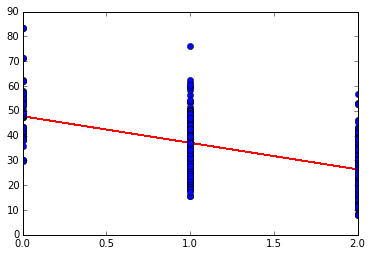

on snp # 2250 ...
on snp # 2500 ...
on snp # 2750 ...


In [42]:
# now we'll use this function

bestPval, bestSnp, listOfPvalues, listOfSnpCoords = regionVsSingleGene( 
        pathToQuantFile,
        pathToMyRegionGenotypes,
        'ENSG00000164307', 
        chromo,
        startPos, 
        endPos,
        cutoffToPlot=1e-65,
        makePlots=True )

In [43]:
print('best p value is',bestPval)

best p value is 1.03841478464e-66


#### DIY: modify above code to produce a boxplot rather than a scatterplot
- hint - in addition to making a list of all x (genotype) and y (expression values), also construct lists of values for the 0/0, 0/1, and 1/1 genotypes

In [47]:
# One solution
def regionVsSingleGeneBoxplot( fnQuant,
                        fnRegionVcf,
                        gene, 
                        chromo,
                        startPos, 
                        endPos,
                        cutoffToPlot = 1e-40,
                        makePlots=True ):

    vcfFile = vcf.Reader( open(fnRegionVcf,'r') )

    expressionTableIndivs = readIndivNamesFromExpressionTable( fnQuant )
        
    bestPval = 1e99
    bestSnpCoord = None

    listOfSnpCoords = []
    listOfPvalues = []    

    indivToExpr = extractExpressionValues( fnQuant, gene, expressionTableIndivs )

    listOfExpressionValues = []
    for sample in expressionTableIndivs:
        listOfExpressionValues.append( indivToExpr[sample] )

    counter = 0

    for record in vcfFile.fetch( chromo, startPos, endPos ):

        counter += 1
        if counter % 250 == 0 :
            print 'on snp #',counter,'...'

        if record.INFO['AF'] < 0.05 or record.INFO['AF'] > 0.95:
            continue

        listOfSnpCoords.append( record.POS )

        #look up each sample genotype using sample list
        listOfGenotypeCalls = []

        # ADDED CODE HERE FOR BOXPLOTS ######
        listExpressionValuesHmzAlt=[]
        listExpressionValuesHet = []
        listExpressionValuesHmzRef=[]
        #####################################


        for sample in expressionTableIndivs:
            call = record.genotype( sample )
            geno = call.gt_type
            if geno != 0 and geno != 1 and geno != 2:
                geno = 0
            listOfGenotypeCalls.append( geno )
            
            # ADDED CODE HERE FOR BOXPLOTS ######
            if geno==0:
                listExpressionValuesHmzRef.append( indivToExpr[sample] )
            elif geno==1:
                listExpressionValuesHet.append( indivToExpr[sample]  )
            elif geno==2:
                listExpressionValuesHmzAlt.append( indivToExpr[sample]  )
            #####################################


            
            
        #conver to numpy array for calculations     
        y = np.array(listOfExpressionValues)
        xi = np.array(listOfGenotypeCalls)

        #Based on http://glowingpython.blogspot.com/2012/03/linear-regression-with-numpy.html
        slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
        listOfPvalues.append( p_value )

        if p_value < bestPval:
            bestPval = p_value
            bestSnp = record.POS

        # plot quick scatter plot with regression line
        if p_value < cutoffToPlot and makePlots:
            print(record.ID)
            print('gene',gene)
            print('r value', r_value)
            print('p_value', p_value)
            print('standard deviation', std_err)

            # ADDED CODE HERE FOR BOXPLOTS ######
            plt.boxplot( x=[listExpressionValuesHmzRef,listExpressionValuesHet,listExpressionValuesHmzAlt],
                        labels=['0/0','0/1','1/1'] )
            plt.show()



    return bestPval, bestSnp, listOfPvalues, listOfSnpCoords
            
            

on snp # 250 ...
on snp # 500 ...
on snp # 750 ...
on snp # 1000 ...
on snp # 1250 ...
on snp # 1500 ...
on snp # 1750 ...
on snp # 2000 ...
snp_5_96124959
gene ENSG00000164307
r value -0.60344179604
p_value 1.03841478464e-66
standard deviation 0.551259004708


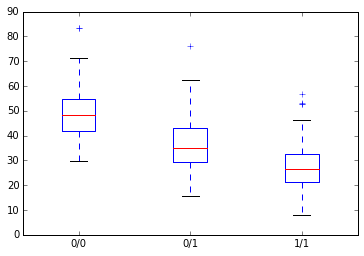

on snp # 2250 ...
on snp # 2500 ...
on snp # 2750 ...


In [48]:
# now we'll use this function

bestPval, bestSnp, listOfPvalues, listOfSnpCoords = regionVsSingleGeneBoxplot( 
        pathToQuantFile,
        pathToMyRegionGenotypes,
        'ENSG00000164307', 
        chromo,
        startPos, 
        endPos,
        cutoffToPlot=1e-65,
        makePlots=True )

#### DIY: make a Manhattan plot
 - SNP p-value versus coordinate
 - usually it's best to view these as -log10(p) -- numpy has a log10 function

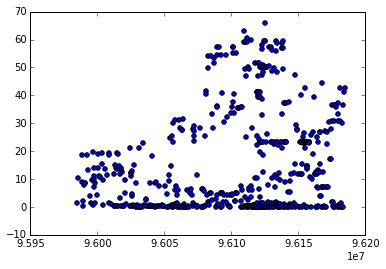

In [46]:
#one solution
plt.scatter( x=listOfSnpCoords, y=-np.log10(listOfPvalues) )

### Challenge ideas
 - Expand the regions, then loop over multiple genes within the region.  Do cis-eQTLs for a given gene act as the same for adjacent genes?
 - Implement a permutation method to estimate false discovery rate.  For instance, you could add a new function to scramble the genotype values amongst individuals as they are read (or likewise for the expression values)